In [195]:
#import Dataframe libraries
import pandas as pd
import numpy  as np
#Importing visiulization libraries
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#import warning
import warnings
warnings.filterwarnings('ignore')

In [196]:
#Getting the data
df=pd.read_csv('trial.csv')

In [197]:
#showing the first 5 row
df.head()

,Year,No
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,NaN


In [198]:
#show the last 5 row
df.tail()

,Year,No
85,202302,1471.0
86,202303,704.0
87,202304,1134.0
88,202305,1381.0
89,202306,936.0


In [199]:
#checking the missing value 
df.isnull().sum()

Year    0
No      2
dtype: int64

###### 1.There is missing value sales columns so we will fill with 0 value.

In [200]:
#checking the shape
df.shape

(90, 2)

###### 1.The data is 90 rows and two columns

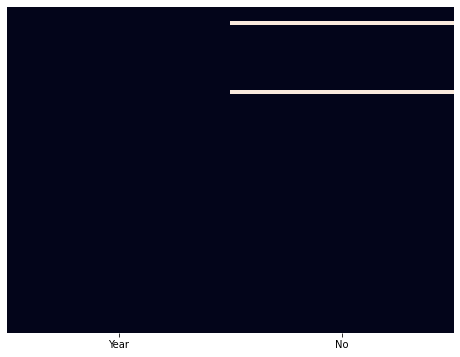

In [201]:
#showing in visiulization method
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()
     

In [202]:
#as this is sale will fill null value with zero
df['No'].fillna(df['No'].mode()[0],inplace=True)

##### We have fill the nan valuw with mode method as the data is sales we cant loose the data.

In [203]:
df

,Year,No
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0
...,...,...
85,202302,1471.0
86,202303,704.0
87,202304,1134.0
88,202305,1381.0


In [204]:
#Lets rename the no coulumn
df.rename(columns={'No':'No of Sales'},inplace=True)
     

In [205]:
df

,Year,No of Sales
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0
...,...,...
85,202302,1471.0
86,202303,704.0
87,202304,1134.0
88,202305,1381.0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         90 non-null     int64  
 1   No of Sales  90 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         90 non-null     int64  
 1   No of Sales  90 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


In [208]:
df['Year'] = pd.to_datetime(df['Year'])

In [209]:
df

,Year,No of Sales
0,1970-01-01 00:00:00.000201601,50.0
1,1970-01-01 00:00:00.000201602,10.0
2,1970-01-01 00:00:00.000201603,21.0
3,1970-01-01 00:00:00.000201604,81.0
4,1970-01-01 00:00:00.000201605,0.0
...,...,...
85,1970-01-01 00:00:00.000202302,1471.0
86,1970-01-01 00:00:00.000202303,704.0
87,1970-01-01 00:00:00.000202304,1134.0
88,1970-01-01 00:00:00.000202305,1381.0


##### To see the data how is looking we have applied datatime but its not working so we decided the data should be int format.

In [210]:
df['Year']=df['Year'].astype(int)

In [211]:
df

,Year,No of Sales
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0
...,...,...
85,202302,1471.0
86,202303,704.0
87,202304,1134.0
88,202305,1381.0


In [212]:
monthly_sales = df.groupby('Year').sum().reset_index()

In [213]:
monthly_sales.head()

,Year,No of Sales
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0


In [214]:
df.describe()

,Year,No of Sales
count,90.000000,90.000000
mean,201932.966667,515.388889
std,218.360307,616.187293
min,201601.000000,0.000000
25%,201711.250000,100.750000
50%,201909.500000,208.500000
75%,202107.750000,752.750000
max,202306.000000,2448.000000


#1.As we can see in the data that in sales the max 2448 sales have been done in the company.
#2.The min is 0 
3#.The median is 208
4#In the year column the sale has started in 2016 first month till 2023 year june.

### EDA

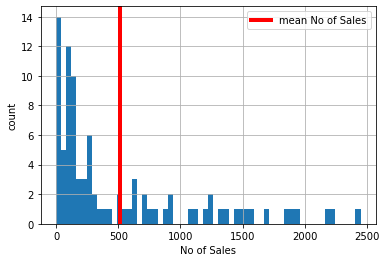

In [215]:
No_of_Sales=df["No of Sales"].hist(bins=60)
mean_val=np.mean(df["No of Sales"])
plt.axvline(mean_val,linewidth=4,color="red",label="mean No of Sales")
plt.xlabel("No of Sales")
plt.ylabel("count")
plt.legend()
plt.show()

In [ ]:
#We tried to take the mean of sale as we can see in the data its almost 500.

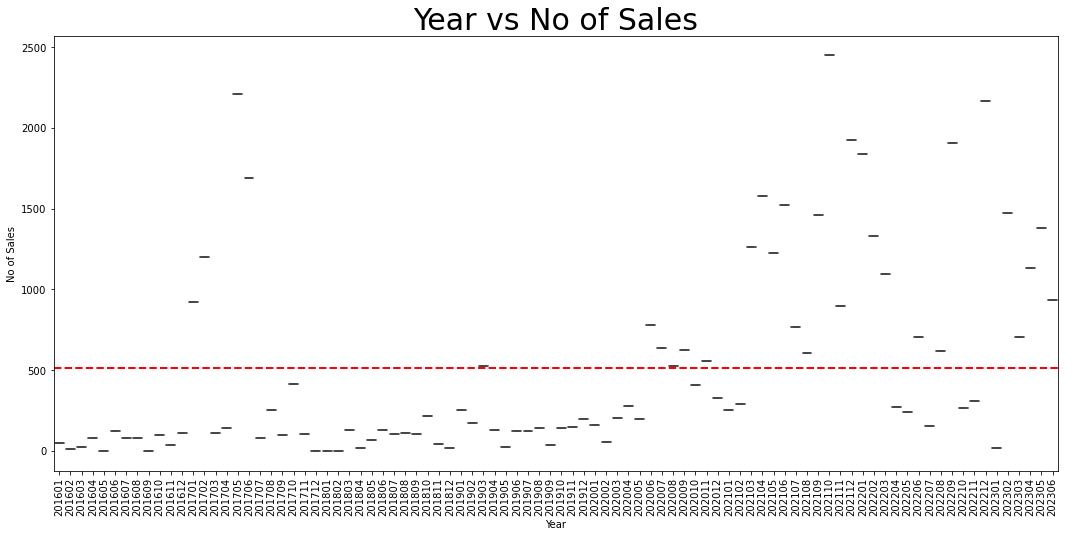

In [216]:

plt.figure(figsize=(18,8))
mean_Sales=np.mean(df["No of Sales"])
sns.boxplot(y="No of Sales",x="Year",data=df,palette="rainbow")
plt.axhline(mean_Sales,color="r",linestyle="dashed",linewidth=2)
plt.title("Year vs No of Sales",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
#As i try to see data in boxplot but we did not get anything from visulization.

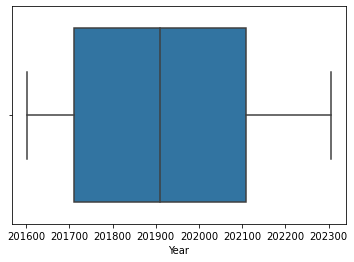

In [217]:
#As we applied box plot for this we can see that the sale is very good in the year of 2017 to 2021
sns.boxplot(df['Year'])
plt.show()

In [218]:
#checking corelation
corr=df

In [219]:
corr

,Year,No of Sales
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0
...,...,...
85,202302,1471.0
86,202303,704.0
87,202304,1134.0
88,202305,1381.0


### Checking Skewness

In [220]:
df.skew()

Year           0.040652
No of Sales    1.424584
dtype: float64

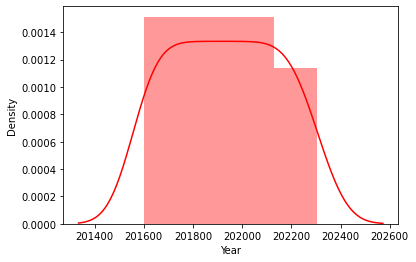

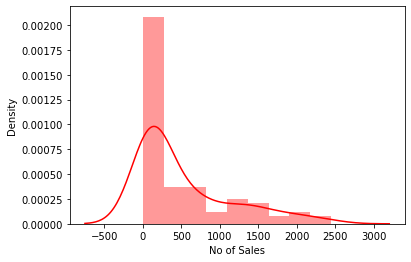

In [221]:
for col in df.describe().columns:
    sns.distplot(df[col],color="r")
    plt.show()

Remark:No of sales is out of skew, the range should be -0.5,+0.5 so i will not remove the skewness from sales data because it we can loss the data

In [222]:
#splitting the data into x and y ,x is independent data and y is dependent that is target variable
x=df.drop(['No of Sales'],axis=1)
y=df['No of Sales']

In [223]:
x

,Year
0,201601
1,201602
2,201603
3,201604
4,201605
...,...
85,202302
86,202303
87,202304
88,202305


In [224]:
y

0       50.0
1       10.0
2       21.0
3       81.0
4        0.0
       ...  
85    1471.0
86     704.0
87    1134.0
88    1381.0
89     936.0
Name: No of Sales, Length: 90, dtype: float64

### Now The Model for training and testing

In [227]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)

In [231]:
rf=RandomForestRegressor()
rf.fit(x,y)
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)



 Training Score: 89.84351199269764

 Testing Score: 93.43292568569055


In [232]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [233]:
mean_absolute_error(y_test,y_pred)

78.05222222222223

In [234]:
mean_squared_error(y_test,y_pred)

17317.581099999996

In [235]:
np.sqrt(mean_squared_error(y_test,y_pred))

131.59628072251888

### Finding best Model

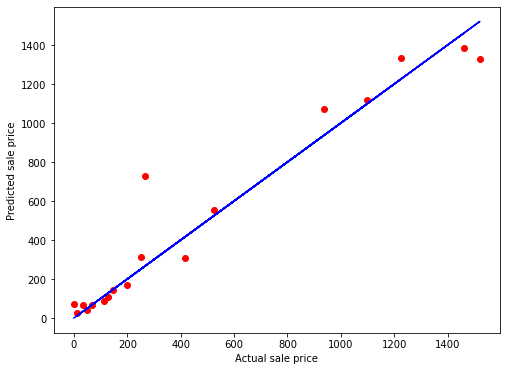

In [236]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual sale price',fontsize=10)
plt.ylabel('Predicted sale price',fontsize=10)
plt.show()

In [237]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rf,open('Sales Predict','wb'))

In [238]:
#Loading the saved model
model=pickle.load(open('Sales Predict','rb'))

In [239]:
#Prediction
prediction=model.predict(x_test)
prediction

array([  69.73,  728.53, 1332.17,  306.02,  143.86,   25.06,   39.86,
       1117.94,   68.06,   67.29,  315.03, 1072.81, 1382.35,  169.51,
       1327.94,  556.44,  109.83,   85.63])

In [240]:
Predicted_sales_Price=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
Predicted_sales_Price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Predicted,69.73,728.53,1332.17,306.02,143.86,25.06,39.86,1117.94,68.06,67.29,315.03,1072.81,1382.35,169.51,1327.94,556.44,109.83,85.63
Actual,0.00,267.00,1227.00,415.00,147.00,10.00,50.00,1097.00,69.00,35.00,250.00,936.00,1460.00,198.00,1521.00,524.00,128.00,111.00


# Direct method

In [242]:
lr=LinearRegression()

In [243]:
lr.fit(x,y)

LinearRegression()

In [256]:
sales=lr.predict(x)

In [257]:
print(sales)

[  56.47522948   57.85763834   59.24004719   60.62245605   62.0048649
   63.38727376   64.76968261   66.15209146   67.53450032   68.91690917
   70.29931803   71.68172688  194.71611493  196.09852379  197.48093264
  198.8633415   200.24575035  201.62815921  203.01056806  204.39297692
  205.77538577  207.15779463  208.54020348  209.92261233  332.95700039
  334.33940924  335.7218181   337.10422695  338.48663581  339.86904466
  341.25145351  342.63386237  344.01627122  345.39868008  346.78108893
  348.16349779  471.19788584  472.58029469  473.96270355  475.3451124
  476.72752126  478.10993011  479.49233897  480.87474782  482.25715668
  483.63956553  485.02197438  486.40438324  609.43877129  610.82118015
  612.203589    613.58599786  614.96840671  616.35081556  617.73322442
  619.11563327  620.49804213  621.88045098  623.26285984  624.64526869
  747.67965674  749.0620656   750.44447445  751.82688331  753.20929216
  754.59170102  755.97410987  757.35651873  758.73892758  760.12133643
  761.50

In [258]:
#This are the predicted prices of the flight tickets
Predicted_sale_Price=pd.DataFrame([model.predict(x)[:],sales[:]],index=['Actual','Predicted'])
Predicted_sale_Price

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Actual,39.860000,25.060000,24.300000,61.570000,32.830000,94.150000,92.520000,73.370000,25.3200,65.670000,...,1294.600000,728.530000,546.510000,1517.59000,466.250000,1047.450000,919.930000,1055.800000,1287.430000,1072.810000
Predicted,56.475229,57.857638,59.240047,60.622456,62.004865,63.387274,64.769683,66.152091,67.5345,68.916909,...,896.979813,898.362222,899.744631,901.12704,1024.161428,1025.543837,1026.926245,1028.308654,1029.691063,1031.073472
